In [1]:
#Qiskit [kiss-kit] is an open-source SDK for working with quantum computers at the level of pulses, circuits, and application modules
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit, BasicAer, IBMQ, execute
from qiskit.tools.visualization import plot_histogram
import matplotlib.pyplot as plt
import numpy as np
import imageio,os
%matplotlib inline

Co = 1
Re = 5*Co
steps=20

QrC = QuantumRegister(Co, 'scratch')
QrR = QuantumRegister(Re, 'input')
Cr = ClassicalRegister(Re)

backend = BasicAer.get_backend("qasm_simulator")

In [2]:
def jobplot(job, ax, color='C0', Re=Re,alpha=1,label=None):
    xlst,ylst = [],[]
    for i in job:
        val = int(i,2)
        if val>=2**(Re-1) :
            xlst += [(val-2**Re+0)*-1-1]
        else:
            xlst += [(val+0)*-1-1]
        ylst +=[job[i]] 
    ax.bar(xlst,ylst,alpha=alpha,color=color,label=label)
    
def jobNorm(job):
    total = 0
    for i in job:
        total += job[i]
    lst = [job[i]/(total) for i in job]

    jod = {}
    for i,v in enumerate(job):
        jod[v] = lst[i]
    return [job, jod]
    
def flipReg():
    qc.cx(QrC[0],QrR[0])
    qc.x(QrR[0])
    qc.ccx(QrC[0],QrR[0],QrR[1])
    qc.x(QrR[1])
    qc.mcx([QrC[0],QrR[0],QrR[1]],QrR[2])
    qc.x(QrR[2])
    qc.mcx([QrC[0],QrR[0],QrR[1],QrR[2]],QrR[3])
    qc.x(QrR[3])
    qc.mcx([QrC[0],QrR[0],QrR[1],QrR[2],QrR[3]],QrR[4])
    qc.x(QrC[0])
    qc.mcx([QrC[0],QrR[0],QrR[1],QrR[2],QrR[3]],QrR[4])
    qc.x(QrR[3])
    qc.mcx([QrC[0],QrR[0],QrR[1],QrR[2]],QrR[3])
    qc.x(QrR[2])
    qc.mcx([QrC[0],QrR[0],QrR[1]],QrR[2])
    qc.x(QrR[1])
    qc.ccx(QrC[0],QrR[0],QrR[1])
    qc.x(QrR[0])
    qc.cx(QrC[0],QrR[0])
    
def flipReg1():
    qc.mcx([QrC[0],QrR[0],QrR[1],QrR[2],QrR[3]],QrR[4])
    qc.mcx([QrC[0],QrR[0],QrR[1],QrR[2]],QrR[3])
    qc.mcx([QrC[0],QrR[0],QrR[1]],QrR[2])
    qc.ccx(QrC[0],QrR[0],QrR[1])
    qc.cx(QrC[0],QrR[0])

    qc.x(QrC[0])
    for i in range(4):
        qc.x(QrR[i])
    qc.mcx([QrC[0],QrR[0],QrR[1],QrR[2],QrR[3]],QrR[4])
#     qc.x(QrR[3])
    qc.mcx([QrC[0],QrR[0],QrR[1],QrR[2]],QrR[3])
#     qc.x(QrR[2])
    qc.mcx([QrC[0],QrR[0],QrR[1]],QrR[2])
#     qc.x(QrR[1])
    qc.ccx(QrC[0],QrR[0],QrR[1])
#     qc.x(QrR[0])
    qc.cx(QrC[0],QrR[0])


 increase operator (the quantum counter)


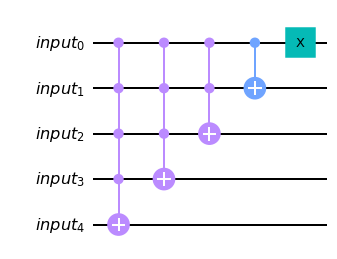

decrease operator: version 1


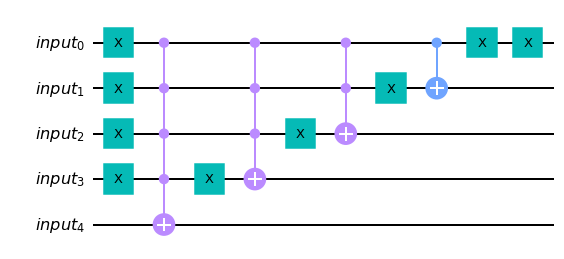

decrease operator: version 2 (reverse counter)


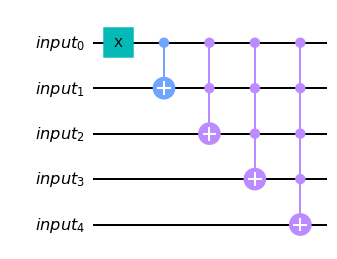

In [3]:
Co = 1
Re = 5*Co

QrC = QuantumRegister(Co, 'scratch')
QrR = QuantumRegister(Re, 'input')
Cr = ClassicalRegister(Re)

backend = BasicAer.get_backend("qasm_simulator")

print ('\n increase operator (the quantum counter)')
# increase block
inqc = QuantumCircuit(QrR)

for i in range(Re-1):
    inqc.mcx(QrR[:Re-1-i],QrR[Re-1-i])
inqc.x(0)
display(inqc.draw('mpl'))

ingate = inqc.to_gate()
cingate = ingate.control(label="increase gate")

print ('decrease operator: version 1')
# decrease block: following paper
deqc = QuantumCircuit(QrR)

deqc.x(QrR[:Re-1])
for i in range(Re-1):
    deqc.mcx(QrR[:Re-1-i],QrR[Re-1-i])
    deqc.x(QrR[Re-1-i-1])
deqc.x(QrR[0])

display(deqc.draw('mpl'))

degate = deqc.to_gate()
cdegate = degate.control(label="decrease gate")

print ('decrease operator: version 2 (reverse counter)')
# decrease block2: reversible
deqc2 = QuantumCircuit(QrR)

deqc2.x(0)
for i in range(Re-1,0,-1):
    deqc2.mcx(QrR[:Re-1-(i-1)],QrR[Re-1-(i-1)])

display(deqc2.draw('mpl'))

degate2 = deqc2.to_gate()
cdegate2 = degate2.control(label="decrease gate 2")

In [4]:
def classicalWalk(ax, steps=20, alpha=1, color='C0', label = None, sample=100):
    relst = []
    for j in range(sample):
        result = 0
        for i in range(steps):
            result+=2*np.random.randint(2)-1
        relst += [result]
    counts, bins=np.histogram(relst)
    ax.hist(bins[:-1], bins, weights=counts/counts.sum(),
            rwidth=0.2, alpha=alpha, label=label, color=color)
    return (relst)

(array([ 1,  1,  0,  1,  4,  0,  7,  7,  0, 18, 15,  0, 14, 11,  0, 13,  5,
         0,  1,  2]),
 array([-14. , -12.7, -11.4, -10.1,  -8.8,  -7.5,  -6.2,  -4.9,  -3.6,
         -2.3,  -1. ,   0.3,   1.6,   2.9,   4.2,   5.5,   6.8,   8.1,
          9.4,  10.7,  12. ]))

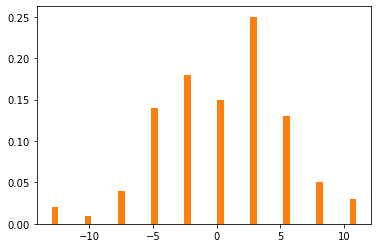

In [5]:
f,ax=plt.subplots()
np.histogram(classicalWalk(ax,color='C1'),bins=steps)

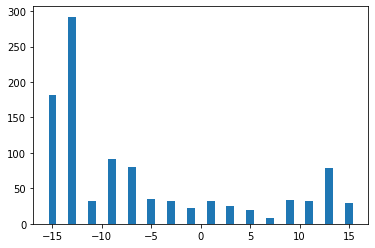

In [6]:
qc = QuantumCircuit(QrC,QrR,Cr)

for i in range(20):
    qc.h(QrC[0])
    flipReg()
#     qc.x(QrC[0])

#     if i==1:
#         display(qc.draw(output='mpl'))

qc.measure(QrR,Cr)

job = execute(qc,backend=backend).result().get_counts()
# display(plot_histogram(job))
f,ax=plt.subplots()
jobplot(job,ax)

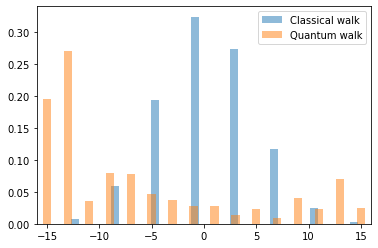

In [7]:
f,ax=plt.subplots()
classicalWalk(ax,steps=22,color='C0',alpha=0.5,label = 'Classical walk',sample=100000)

qc = QuantumCircuit(QrC,QrR,Cr)
for i in range(20):
    qc.h(QrC[0])
    flipReg()
    qc.x(QrC[0])
qc.measure(QrR,Cr)

job = execute(qc,backend=backend).result().get_counts()
xlst,ylst = [],[]
for i in jobNorm(job)[1]:
    val = int(i,2)
    if val>=2**(Re-1)+2 :
        xlst += [(val-2**Re+1)-2]
    else:
        xlst += [(val+1)-2]
    ylst +=[jobNorm(job)[1][i]]  
ax.bar(xlst,ylst,color='C1',alpha=0.5,label = 'Quantum walk')
ax.set_xlim(-16,16)
ax.legend()

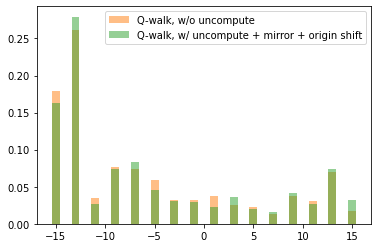

In [17]:
f,ax=plt.subplots()
# classicalWalk(ax,steps=22,color='C0',alpha=0.2,label = 'Classical walk')

qc = QuantumCircuit(QrC,QrR,Cr)
for i in range(20):
    qc.h(QrC[0])
    flipReg()
qc.measure(QrR,Cr)

job = execute(qc,backend=backend).result().get_counts()
jobplot(jobNorm(job)[1],ax,color='C1',alpha=0.5,label = 'Q-walk, w/o uncompute')


qc = QuantumCircuit(QrC,QrR,Cr)
for i in range(20):
    qc.h(QrC[0])
    flipReg()
    qc.x(QrC[0])
qc.measure(QrR,Cr)

job = execute(qc,backend=backend).result().get_counts()
xlst,ylst = [],[]
for i in jobNorm(job)[1]:
    val = int(i,2)
    if val>=2**(Re-1)+2 :
        xlst += [(val-2**Re+1)-2]
    else:
        xlst += [(val+1)-2]
    ylst +=[jobNorm(job)[1][i]]  
ax.bar(xlst,ylst,color='C2',alpha=0.5,label = 'Q-walk, w/ uncompute + mirror + origin shift')
ax.legend()

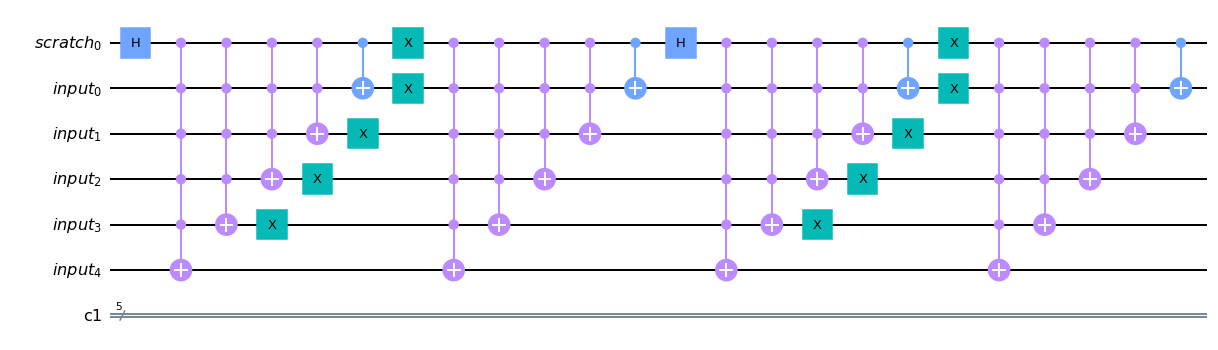

<ipython-input-8-90779a4cc50e>:20: DeprecationWarning: The QuantumCircuit.u2 method is deprecated as of 0.16.0. It will be removed no earlier than 3 months after the release date. You can use the general 1-qubit gate QuantumCircuit.u instead: u2(φ,λ) = u(π/2, φ, λ). Alternatively, you can decompose it interms of QuantumCircuit.p and QuantumCircuit.sx: u2(φ,λ) = p(π/2+φ) sx p(λ-π/2) (1 pulse on hardware).
  qc.u2(phi=np.pi/2, lam=3*np.pi/2, qubit=QrC[0])


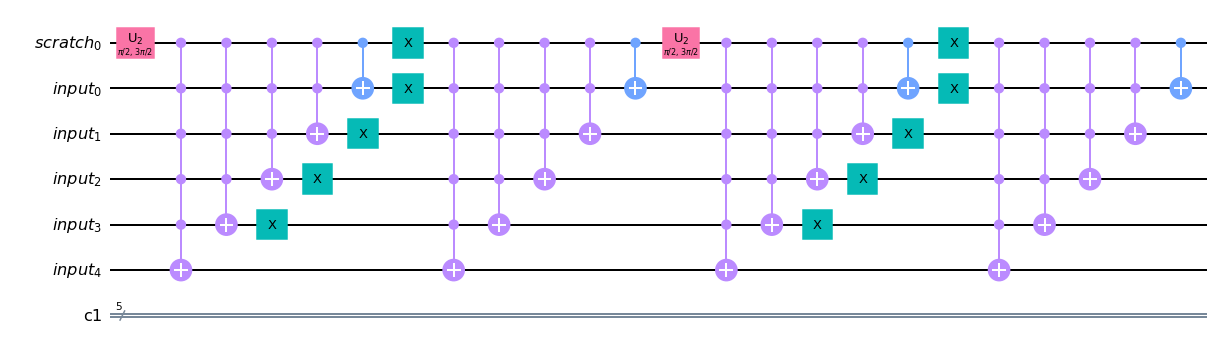

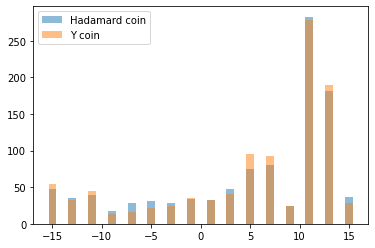

In [8]:
f,ax=plt.subplots()


qc = QuantumCircuit(QrC,QrR,Cr)
for i in range(20):
    qc.h(QrC[0])
    flipReg1()
    if i==1:
        display(qc.draw(output='mpl'))
qc.measure(QrR,Cr)

job = execute(qc,backend=backend).result().get_counts()
jobplot(job,ax, color='C0',alpha=0.5,label = 'Hadamard coin')

ax.legend()


qc = QuantumCircuit(QrC,QrR,Cr)
for i in range(20):
    qc.u2(phi=np.pi/2, lam=3*np.pi/2, qubit=QrC[0])
    flipReg1()
    if i==1:
        display(qc.draw(output='mpl'))
qc.measure(QrR,Cr)

job = execute(qc,backend=backend).result().get_counts()
jobplot(job,ax, color='C1',alpha=0.5,label = 'Y coin')

ax.legend()

<ipython-input-13-5c8521526620>:16: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  f,ax=plt.subplots()


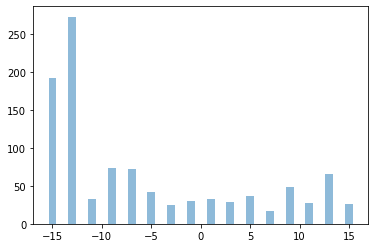

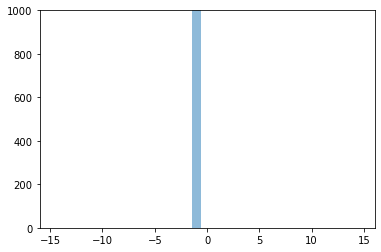

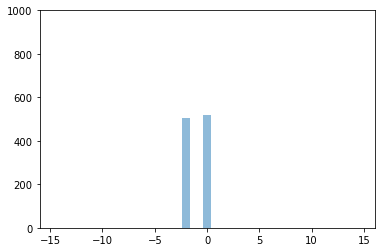

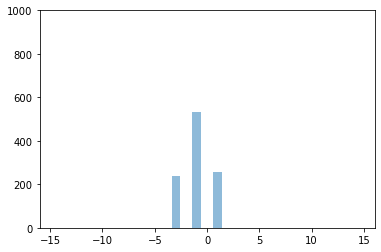

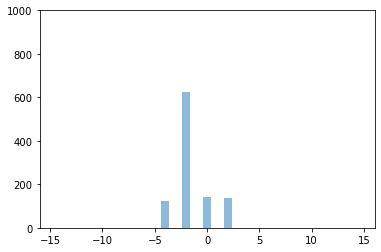

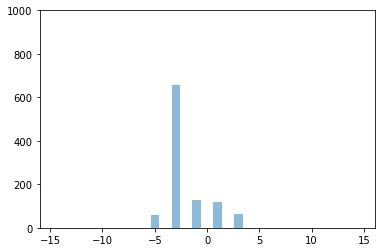

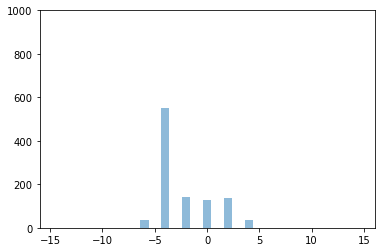

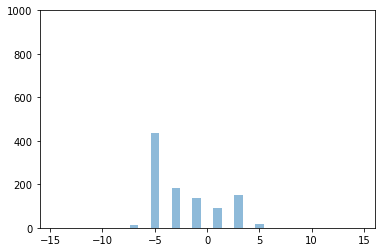

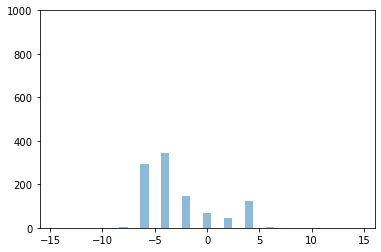

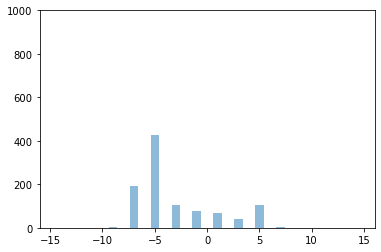

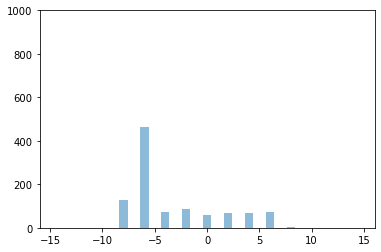

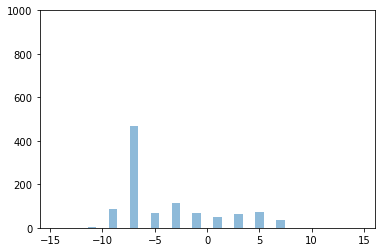

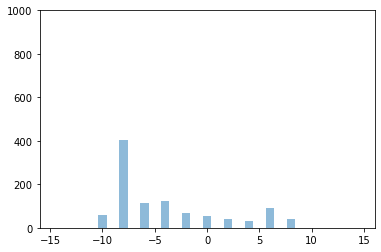

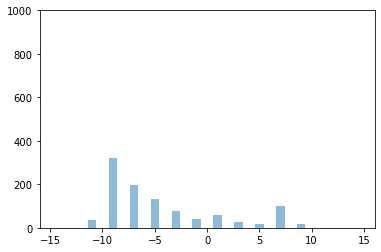

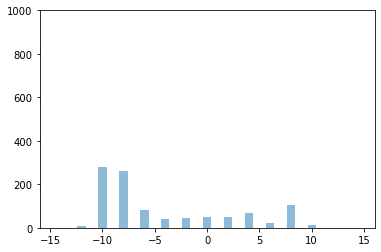

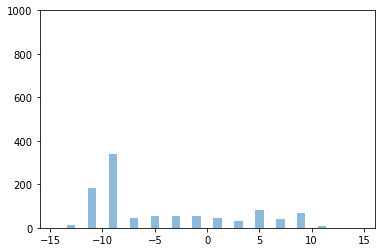

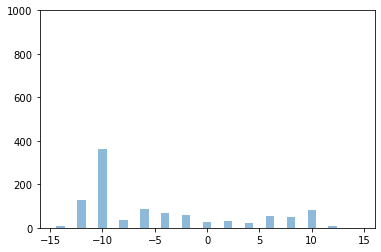

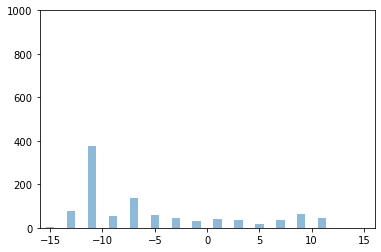

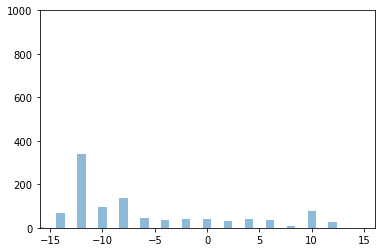

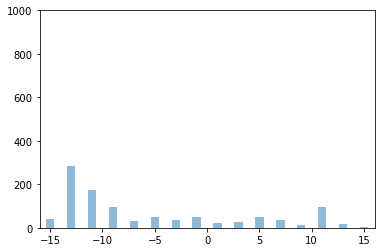

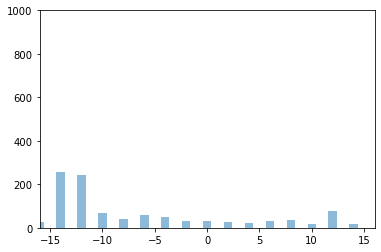

In [13]:
f,ax=plt.subplots()

qc = QuantumCircuit(QrC,QrR,Cr)
for i in range(20):
    qc.h(QrC[0])
    flipReg()
#     if i==1:
#         display(qc.draw(output='mpl'))
qc.measure(QrR,Cr)

job = execute(qc,backend=backend).result().get_counts()
jobplot(job,ax,alpha=0.5,label = 'H')

steps = 20
for j in range (steps):
    f,ax=plt.subplots()
    qc = QuantumCircuit(QrC,QrR,Cr)
    for i in range(j):
        qc.h(QrC[0])
        flipReg()
    qc.measure(QrR,Cr)

    job = execute(qc,backend=backend).result().get_counts()
    jobplot(job,ax,alpha=0.5,label = '{}'.format(j))
    ax.set_xlim(-16,16)
    ax.set_ylim(0,1000)
    f.savefig('pic_{}.png'.format(j))
    
filenames = ['pic_'+str(i)+'.png' for i in range(steps)]
with imageio.get_writer('mygif.gif', mode='I', fps = 2) as writer:
    for filename in filenames:
        image = imageio.imread(filename)
        writer.append_data(image)
for filename in set(filenames):
    os.remove(filename)

In [14]:
def flipReg2():
    qc.cx(QrC[0],QrR[0])
    qc.y(QrR[0])
    qc.ccx(QrC[0],QrR[0],QrR[1])
    qc.y(QrR[1])
    qc.mcx([QrC[0],QrR[0],QrR[1]],QrR[2])
    qc.y(QrR[1])
    qc.ccx(QrC[0],QrR[0],QrR[1])
    qc.y(QrR[0])
    qc.cx(QrC[0],QrR[0])

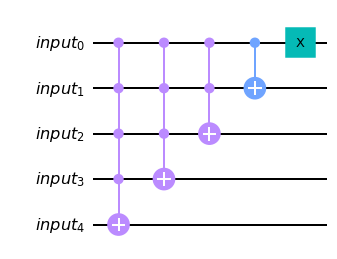

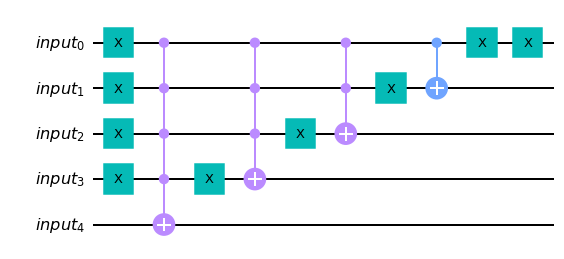

In [15]:
Co = 1
Re = 5*Co
QrR = QuantumRegister(Re, 'input')

# increase block
inqc = QuantumCircuit(QrR)

for i in range(Re-1):
    inqc.mcx(QrR[:Re-1-i],QrR[Re-1-i])
inqc.x(0)
display(inqc.draw('mpl'))

ingate = inqc.to_gate()
cingate = ingate.control()

# decrease block
deqc = QuantumCircuit(QrR)

deqc.x(QrR[:Re-1])
for i in range(Re-1):
    deqc.mcx(QrR[:Re-1-i],QrR[Re-1-i])
    deqc.x(QrR[Re-1-i-1])
deqc.x(QrR[0])
# deqc.barrier()
display(deqc.draw('mpl'))

degate = deqc.to_gate()
cdegate = degate.control()

In [34]:
from qiskit.circuit import Gate
my_gate = Gate(name='my_gate', num_qubits= 6,params=[])
circuit = QuantumCircuit(8)
circuit.append(my_gate, [0,2,3,4,5,6])
circuit.draw()

┌──────────┐
q_0: ┤0         ├
     │          │
q_1: ┤          ├
     │          │
q_2: ┤1         ├
     │          │
q_3: ┤2 my_gate ├
     │          │
q_4: ┤3         ├
     │          │
q_5: ┤4         ├
     │          │
q_6: ┤5         ├
     └──────────┘
q_7: ────────────

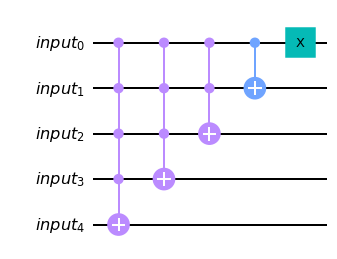

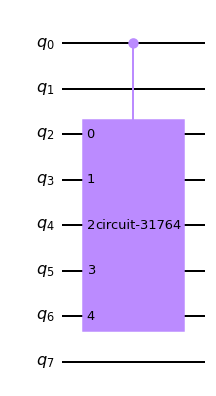

In [35]:
Co = 1
Re = 5*Co

QrC = QuantumRegister(Co, 'scratch')
QrR = QuantumRegister(Re, 'input')
Cr = ClassicalRegister(Re)

myqc = QuantumCircuit(QrR)

for i in range(Re-1):
    myqc.mcx(QrR[:Re-1-i],QrR[Re-1-i])
myqc.x(0)
display(myqc.draw('mpl'))

mygate = myqc.to_gate()
cmygate = mygate.control()

circuit = QuantumCircuit(8)
circuit.append(cmygate, [0,2,3,4,5,6])
circuit.draw('mpl')


In [36]:
QrC = QuantumRegister(Co, 'scratch')
QrR = QuantumRegister(Re, 'input')
Cr = ClassicalRegister(Re)

backend = BasicAer.get_backend("qasm_simulator")

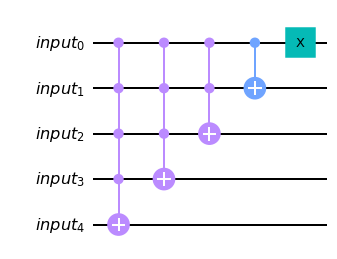

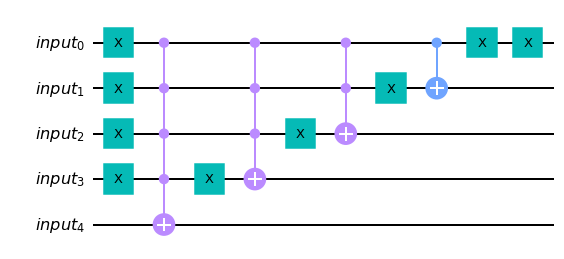

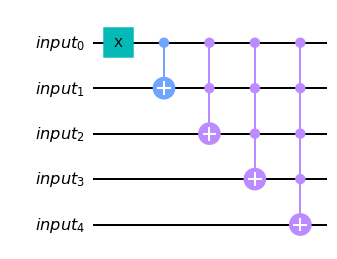

In [37]:
Co = 1
Re = 5*Co

QrC = QuantumRegister(Co, 'scratch')
QrR = QuantumRegister(Re, 'input')
Cr = ClassicalRegister(Re)

backend = BasicAer.get_backend("qasm_simulator")

# increase block
inqc = QuantumCircuit(QrR)

for i in range(Re-1):
    inqc.mcx(QrR[:Re-1-i],QrR[Re-1-i])
inqc.x(0)
display(inqc.draw('mpl'))

ingate = inqc.to_gate()
cingate = ingate.control(label="increase gate")

# decrease block: following paper
deqc = QuantumCircuit(QrR)

deqc.x(QrR[:Re-1])
for i in range(Re-1):
    deqc.mcx(QrR[:Re-1-i],QrR[Re-1-i])
    deqc.x(QrR[Re-1-i-1])
deqc.x(QrR[0])

display(deqc.draw('mpl'))

degate = deqc.to_gate()
cdegate = degate.control(label="decrease gate")


# decrease block2: reversible
deqc2 = QuantumCircuit(QrR)

deqc2.x(0)
for i in range(Re-1,0,-1):
    deqc2.mcx(QrR[:Re-1-(i-1)],QrR[Re-1-(i-1)])

display(deqc2.draw('mpl'))

degate2 = deqc2.to_gate()
cdegate2 = degate2.control(label="decrease gate 2")

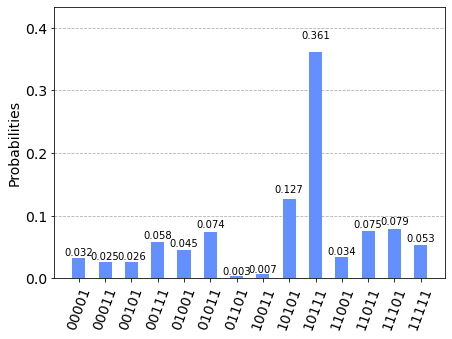

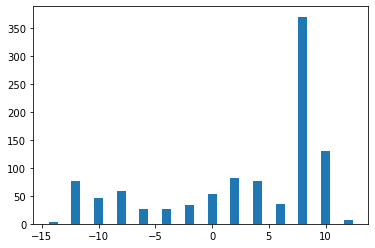

In [38]:
qc = QuantumCircuit(QrC,QrR,Cr)


for i in range(15):
    qc.h(0)
    #qc.u2(np.pi/2,np.pi*3/2, QrC[0])
    qc.append(cingate, [0,1,2,3,4,5])
    #qc.barrier()
    #qc.barrier()
    #qc.u1(np.pi, QrC[0])
    qc.y(QrC[0])
    qc.z(0)
    qc.append(cdegate, [0,1,2,3,4,5])
    qc.y(QrC[0])
    #朝y轉180 
#display(qc.draw())
#     if i==1:
#         display(qc.draw(output='mpl'))

qc.measure(QrR,Cr)

job = execute(qc,backend=backend).result().get_counts()
display(plot_histogram(job))
f,ax=plt.subplots()
jobplot(job,ax)

┌───┐┌────────────────┐┌───┐┌──────────────────┐┌───┐»
scratch_0: ┤ X ├┤0               ├┤ X ├┤0                 ├┤ X ├»
           └───┘│                │└───┘│                  │└───┘»
  input_0: ─────┤1               ├─────┤1                 ├─────»
                │                │     │                  │     »
  input_1: ─────┤2               ├─────┤2                 ├─────»
                │  increase gate │     │  decrease gate 2 │     »
  input_2: ─────┤3               ├─────┤3                 ├─────»
                │                │     │                  │     »
  input_3: ─────┤4               ├─────┤4                 ├─────»
                │                │     │                  │     »
  input_4: ─────┤5               ├─────┤5                 ├─────»
                └────────────────┘     └──────────────────┘     »
     c4: 5/═════════════════════════════════════════════════════»
                                                                »
«           ┌────────────────┐┌───┐┌──────────────────┐┌───┐
«scratch_0: ┤0               ├┤ X ├┤0                 ├┤ X ├
«           │                │└───┘│                  │└───┘
«  input_0: ┤1               ├─────┤1                 ├─────
«           │                │     │                  │     
«  input_1: ┤2               ├─────┤2                 ├─────
«           │  increase gate │     │  decrease gate 2 │     
«  input_2: ┤3               ├─────┤3                 ├─────
«           │                │     │                  │     
«  input_3: ┤4               ├─────┤4                 ├─────
«           │                │     │                  │     
«  input_4: ┤5               ├─────┤5                 ├─────
«           └────────────────┘     └──────────────────┘     
«     c4: 5/════════════════════════════════════════════════
«

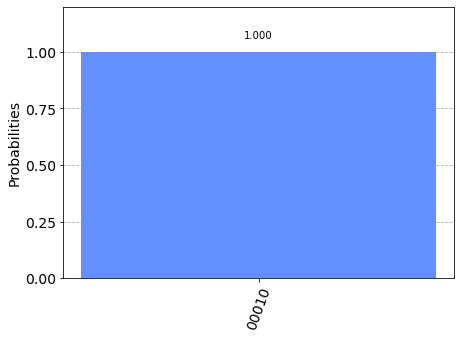

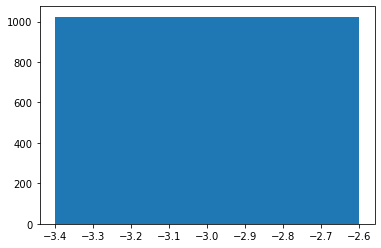

In [39]:
qc = QuantumCircuit(QrC,QrR,Cr)

qc.x(QrC[0])
for i in range(2):
#     qc.h(QrC[0])
    qc.append(cingate, [0,1,2,3,4,5])
    #qc.barrier()
    #qc.barrier()
    qc.x(QrC[0])
    qc.append(cdegate2, [0,1,2,3,4,5])
    qc.x(QrC[0])
    
    
display(qc.draw())
#     if i==1:
#         display(qc.draw(output='mpl'))

qc.measure(QrR,Cr)

job = execute(qc,backend=backend).result().get_counts()
display(plot_histogram(job))
f,ax=plt.subplots()
jobplot(job,ax)